# Deteksi Sarkasme



In [ ]:
import pandas as pd
import re,string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from collections import Counter
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt

In [3]:
def angkadua(teksAwal2):
    final2=[]
    huruf2=""
    for x in range(len(teksAwal2)):
        cek2=[i for i in teksAwal2[x]]
        for x in range(len(cek2)):
            if x==0:
                final2.append(cek2[0])
                huruf2=cek2[0]
            else:
                if cek2[x]!=huruf2:
                    if cek2[x]=="2":
                        if(len(final2))==2:
                            final2.append(cek2[x-2])
                            final2.append(cek2[x-1])
                            huruf2=cek2[x]
                        elif(len(final2)>2):
                            jo="".join(cek2[:2])
                            if(jo=="se" or jo=="di"):
                                final2.append(" ")
                                final2=final2+cek2[2:x]
                                huruf2=cek2[x]
                            else:
                                final2.append(" ")
                                final2=final2+cek2[:x]
                                huruf2=cek2[x]
                        else:
                            final2.append(cek2[x])
                            huruf2=cek2[x]
                    else:
                        final2.append(cek2[x])
                        huruf2=cek2[x]
                else:
                    final2.append(cek2[x])
                    huruf2=cek2[x]
        final2.append(" ")
    hasil = "".join(final2).split()
    return hasil

def hapus_hurufganda(teksAwal):
    jml=0
    
    final=[]
    huruf=""
    for x in range(len(teksAwal)):
        cek=[i for i in teksAwal[x]]
        for x in range(len(cek)):
            if x==0:
                final.append(cek[0])
                huruf=cek[0]
                jml=1
            else:
                if cek[x]!=huruf:
                    final.append(cek[x])
                    huruf=cek[x]
                    jml=1
                else:
                    if jml<2:                    
                        final.append(cek[x])
                        huruf=cek[x]
                        jml+=1
        final.append(" ")
    hasil = "".join(final).split()
    return hasil

def hapus_simbolAngka(text):
    del_angkadua=angkadua(text)
    del_hrfganda=hapus_hurufganda(del_angkadua)
    
    #hasil=[]
    token=del_hrfganda
    lte=["2g","3g","4g","5g"]
    for i in range(len(token)):
        if(token[i] not in lte):
            token[i]=re.sub(r"\d+"," ", token[i])
                
    for ele in range(len(token)):
        token[ele]=token[ele].translate(str.maketrans('', '', string.punctuation))
        token[ele] = re.sub('\W',"",token[ele])
        token[ele] = re.sub('\s+',"",token[ele])

    return token

def hapus_emoticon(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    #hapus emoji
    CleanEmoji=re.sub(emoji_pattern, "", text)
    return CleanEmoji



def tokenize(kalimat):
    return word_tokenize(kalimat)


def listokalimat(kalimat):
    listToStr = ' '.join(kalimat)
    return listToStr


def delstopwordID(teks):
    return [kata for kata in teks if kata not in list_stopwords]

def daftarStopword():
    list_stopwords = stopwords.words('indonesian')
    ##baca tambahan 
    my_file = open("C:\\Users\\AhmadYazidMunif\\JupiterNotebook\\StopWordList.txt", "r")
    tambahan = my_file.read()
    daftar = tambahan.replace('\n', ' ').split()
    ####
    list_stopwords.extend(daftar)
    list_stopwords = set(list_stopwords)
    return list_stopwords

def normal_term():
    normalisasi_word = pd.read_excel('C:\\Users\\AhmadYazidMunif\\JupiterNotebook\\_normalisasiFix.xlsx')
    normalisasi_dict = {}
    for index, row in normalisasi_word.iterrows():
        if row[0] not in normalisasi_dict:
            normalisasi_dict[row[0]] = row[1]
    return normalisasi_dict

def normalisasi(document):
    kalimat=document
    for term in range(len(kalimat)):
        if kalimat[term] in normalisasi_dict:
            kalimat[term]=normalisasi_dict[kalimat[term]]
    hasil = " ".join(kalimat).split()
    return hasil

def stemming(kalimat):
    term_dict={}
    for kata in kalimat:
        for term in kalimat:
            if term not in term_dict:
                term_dict[term]=" "
    temp = list(term_dict)
    for x in range(len(temp)):
        if temp[x]=="jaringan":
            term_dict[temp[x]] = temp[x]
        elif temp[x]=="teh" and temp[x+1]=="anget":
            term_dict[temp[x]] = temp[x]
        else:
            term_dict[temp[x]] = stemmer.stem(temp[x])
    kalimat=[term_dict[term] for term in kalimat]
    #listToStr = ' '.join([str(i) for i in kalimat])
    return kalimat


list_stopwords = daftarStopword()
term_dict={}
factory = StemmerFactory()
stemmer = factory.create_stemmer()
normalisasi_dict = normal_term()



...... Jumlah Data ...... 
Total: 1374
   Sarkasme  BukanSarkas
0       178         1196


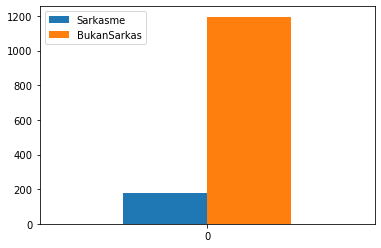

In [5]:
namaFile='C:\\Users\\AhmadYazidMunif\\JupiterNotebook\\#tweet_label.csv'
DataTweet= pd.read_csv(namaFile)
jumlahData=DataTweet["Tweet"].shape[0] #Jumlah Data
jmlSarkas=DataTweet[DataTweet.Label=="Sarkasme"].shape[0]
jmlNonSarkas=DataTweet[DataTweet.Label=="BukanSarkas"].shape[0]
d={'Jumlah': [jumlahData], 'Sarkasme': [jmlSarkas],'BukanSarkas':[jmlNonSarkas]}
cekJumlah = pd.DataFrame(data=d, columns=['Sarkasme','BukanSarkas'])
print('\n...... Jumlah Data ...... ')
print("Total:",jumlahData)
print(cekJumlah)
ax = cekJumlah.plot.bar(rot=0)

In [7]:
def lowRemoveURL(text):
    #lowercase
    lower=text.lower()
    #hapus hastag/mention
    HastagRT=re.sub(r"#(\w+)|@(\w+)|(\brt\b)"," ", lower)
    #hapus URL
    pola_url = r'http\S+'
    CleanURL=re.sub(pola_url," ", HastagRT)
    #hapus emoticon
    hps_emoji=hapus_emoticon(CleanURL)
    #hapus multiWhitespace++, ex: ahh   haa
    text = re.sub('\s+',' ',hps_emoji)
    #hasil akhir casefolding
    hasil=text
    return hasil

#============== Start Processing Text
print("\n##-------- Mulai Proses Preprocessing --------##\n")
print('\n...... Proses Casefolding lowercase, hapus URL...... ')
DataTweet['casefolding1'] = DataTweet['Tweet'].apply(lowRemoveURL)
print(DataTweet)


##-------- Mulai Proses Preprocessing --------##


...... Proses Casefolding lowercase, hapus URL...... 
                                                  Tweet        Label  \
0     @mopuci @collegemenfess Mjb, indogsat 100k 50g...     Sarkasme   
1     ini jaringan pas wiken knp kenceng pakee bgttt...     Sarkasme   
2     @MNCPlayID sudah lebih dari 16 jam layanan int...  BukanSarkas   
3     ⁦@IndiHome⁩ lapor di daerah sukatani tapos dep...  BukanSarkas   
4     indosat ngntd kmpa si, ada jaringan tpi browse...     Sarkasme   
...                                                 ...          ...   
1369  @FirstMediaCares Mohon di percepat yah ka\r\nD...  BukanSarkas   
1370  @IndiHomeCare Kalo pasang kembali justru penga...  BukanSarkas   
1371  @IndiHomeCare internet mati min, jaringan terp...  BukanSarkas   
1372  @BiznetHome min kenapa jaringan tiba2 di matik...  BukanSarkas   
1373  @FirstMediaCares Tidak ada jaringan min dari j...  BukanSarkas   

                             

In [8]:
#==== Tokenisasi : memisahkan kata dalam kalimat
print('\n...... Tokenisasi ...... ')
DataTweet['Tokenisasi'] = DataTweet['casefolding1'].apply(tokenize)
print(DataTweet[['Tokenisasi']].head(2))


...... Tokenisasi ...... 
                                          Tokenisasi
0  [mjb, ,, indogsat, 100k, 50gb, ., jaringan, le...
1  [ini, jaringan, pas, wiken, knp, kenceng, pake...


In [9]:
print('\n...... Proses Casefolding2 hapus angka dan simbol...... ')
DataTweet['casefolding2'] = DataTweet['Tokenisasi'].apply(hapus_simbolAngka)
print(DataTweet[['casefolding2']].head(2))


...... Proses Casefolding2 hapus angka dan simbol...... 
                                        casefolding2
0  [mjb, , indogsat, k, gb, , jaringan, lebih, ok...
1  [ini, jaringan, pas, wiken, knp, kenceng, pake...


In [10]:
#============== Normalisasi: kata gaul, singkatan jadi kata baku
print('\n...... Proses Normalisasi ...... ')
DataTweet['Normalisasi'] = DataTweet['casefolding2'].apply(normalisasi)
print(DataTweet[['Normalisasi']].head(2))


...... Proses Normalisasi ...... 
                                         Normalisasi
0  [maaf, gabung, bareng, indosat, k, gigabyte, j...
1  [ini, jaringan, waktu, minggu, kenapa, cepat, ...


In [11]:
#==== Stopword Removal : hapus kata yang tidak terlalu penting
print('\n...... Proses Stopword Removal ...... ')
DataTweet['Stopword'] = DataTweet['Normalisasi'].apply(delstopwordID)
print(DataTweet[['Stopword']].head(6))


...... Proses Stopword Removal ...... 
                                            Stopword
0  [maaf, gabung, bareng, indosat, k, gigabyte, j...
1  [jaringan, minggu, cepat, pakai, banget, oi, g...
2   [jam, layanan, internet, televisi, jaringan, cc]
3  [lapor, daerah, sukatani, tapos, depok, indiho...
4  [indosat, ngentot, sih, jaringan, browser, jalan]
5           [malas, tidur, jaringan, ngajak, kelahi]


In [12]:
#==== Stemming : mengurangi dimensi fitur kata/term
print('\n................ Proses Stemming ................ ')
DataTweet['Stemmed'] = DataTweet['Stopword'].apply(stemming)
print(DataTweet['Stemmed'].head(3))
DataTweet['newTweet'] = DataTweet['Stemmed'].apply(listokalimat)
print('\n==========')
print(DataTweet['newTweet'].head(2))


................ Proses Stemming ................ 
0    [maaf, gabung, bareng, indosat, k, gigabyte, j...
1    [jaringan, minggu, cepat, pakai, banget, oi, g...
2       [jam, layan, internet, televisi, jaringan, cc]
Name: Stemmed, dtype: object

0    maaf gabung bareng indosat k gigabyte jaringan...
1    jaringan minggu cepat pakai banget oi gilir ku...
Name: newTweet, dtype: object


In [13]:
#====================== lakukan TF-IDF
print('\n................ Hitung TF-IDF ................ ')
tfidf_vect = TfidfVectorizer()
vect_docs = tfidf_vect.fit_transform(DataTweet['newTweet'])
#print(vect_docs)
features_names = tfidf_vect.get_feature_names_out()

datane = []
means=vect_docs.mean(axis=0)
for col, term in enumerate(features_names):
    datane.append( (term, means[0,col] ))

ranking = pd.DataFrame(datane, columns=['term','rata2bobot'])
ranking = ranking.sort_values('rata2bobot', ascending=False)
print(ranking.head(7))

dense = vect_docs.todense()
alist = dense.tolist()
print('\n================')
newData = pd.DataFrame(alist,columns=features_names)
print(newData)


................ Hitung TF-IDF ................ 
          term  rata2bobot
535   jaringan    0.105116
501   internet    0.053987
117     banget    0.046293
545      jelek    0.042897
1447        ya    0.033473
702     lambat    0.032434
490   indihome    0.029758

      aamiin  aba  abad  abai  abi  absen  adi  adik     admin  administrator  \
0        0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
1        0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
2        0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
3        0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
4        0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
...      ...  ...   ...   ...  ...    ...  ...   ...       ...            ...   
1369     0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
1370     0.0  0.0   0.0   0.0  0.0    0.0  0.0   0.0  0.000000            0.0   
1371

In [ ]:
x = newData.iloc[:]
y= DataTweet["Label"]

print('\n================ Model ================ ')
print('\n================ Pembagian data Training dan Testing ================ ')
#============================ K-fold Start
print('\nK - Fold Cross Validation')
k=10
kf = KFold(n_splits=k)
print("fold-berjumlah:",k)
kfold=[]
temp_akurasi = []
it=1
TP = 0
FP = 0
TN = 0
FN = 0
for train_index , test_index in kf.split(x):
    X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    print('\n================ Fold ke -',it)
    #print('Data Train\n',X_train)
    #print('Data Test\n',X_test)
    sm = SMOTE(random_state=1)
    x_oversample, y_oversample = sm.fit_resample(X_train, y_train)
    #setelah resampling dengan SMOTE
    jumlah_awal = y_train.shape[0]
    cekLabel_awal = Counter(y_train)
    jumlah_sm = y_oversample.shape[0]
    cekLabel_sm = Counter(y_oversample)
    jumlah_tes = y_test.shape[0]
    print('Jumlah Data latih sebelum SMOTE =', jumlah_awal)
    print('Sarkasme =', cekLabel_awal['Sarkasme'],'BukanSarkas =',cekLabel_awal['BukanSarkas'])
    print('Jumlah Data latih setelah SMOTE =', jumlah_sm)
    print('Sarkasme =', cekLabel_sm['Sarkasme'],'BukanSarkas =',cekLabel_sm['BukanSarkas'])
    print('Jumlah Data Uji =', jumlah_tes)
    baseLearn_svm=SVC(probability=True, kernel='linear')
    model_adaboost =AdaBoostClassifier(n_estimators=30, base_estimator=baseLearn_svm,learning_rate=0.5)
    c=model_adaboost.fit(x_oversample,y_oversample)
    Prediksi = model_adaboost.predict(X_test)
    
    ceklah = pd.DataFrame(columns=['Tweet_Split','Label_Split','Label_Prediksi'])
    ceklah['newTweet'] = DataTweet['Tweet'].iloc[test_index]
    ceklah['Label'] = DataTweet['Label'].iloc[test_index]
    ceklah['LabelPrediksi'] = Prediksi
    
    jumlahtes = ceklah.shape[0]
    positif="Sarkasme"
    negatif="BukanSarkas"
    for i in range(jumlahtes):
        cek=ceklah.iloc[i]
        if (cek.Label==positif and cek.LabelPrediksi==positif):
            TP+=1
        elif(cek.Label==positif and cek.LabelPrediksi==negatif):
            FP+=1
        elif(cek.Label==negatif and cek.LabelPrediksi==negatif):
            TN+=1
        elif(cek.Label==negatif and cek.LabelPrediksi==positif):
            FN+=1
    
    print("(TP) TruePositif :",TP,"\n(FP) FalsePositif :",FP,"\n(TN) TrueNegatif :",TN,"\n(FN) FalsePNegatif :",FN)
    akurasi=(TP+TN)/(TP+FP+TN+FN)
    hasil_akurasi = round(akurasi,3)*100
    temp_akurasi.append(hasil_akurasi)
    print('Akurasi Fold ke -',it,'=',hasil_akurasi)
    kfold.append([jumlahtes,TP,FP,TN,FN,hasil_akurasi])
    it=it+1
    TP = 0
    FP = 0
    TN = 0
    FN = 0

rata2=0
for x in range(len(temp_akurasi)):
    rata2=rata2+temp_akurasi[x]
print(round(rata2/k,3))
print(kfold)

#============================ K-fold End